## ⚙️ Importando bibliotecas necessárias

In [ ]:
# Importações

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('s3://alura-aws-ciencia-dados/raw/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Para ver informações sobre esses atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Os atributos incluem:

- Age: idade do paciente
- Sex: sexo do paciente, masculino ou feminino (F, M)
- ChestPainType: tipo de dor no peito [TA: angina típica, ATA: angina atípica, NAP: dor não anginosa, ASY: assintomática]
- RestingBP: pressão arterial em repouso [mm Hg]
- Cholesterol: colesterol [mm/dl]
- FastingBS: glicemia em jejum — [1: se FastingBS > 120 mg/dl, 0: caso contrário]
- RestingECG: resultados do eletrocardiograma em repouso — [Normal: normal, ST: presença de anormalidades na onda ST-T (inversão da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV), LVH: possível ou definida hipertrofia ventricular esquerda segundo os critérios de Estes]
- MaxHR: frequência cardíaca máxima alcançada — [valor numérico entre 60 e 202]
- ExerciseAngina: angina induzida por exercício — [Y: Sim, N: Não]
- Oldpeak: valor de “oldpeak” = depressão do segmento ST — [valor numérico medido em depressão]
- ST_Slope: inclinação do segmento ST durante o pico do exercício — [Up: ascendente, Flat: plana, Down: descendente]
- HeartDisease: variável alvo — [1: presença de doença cardíaca, 0: normal]

In [ ]:
# Separando colunas em diferentes categorias para facilitar algumas etapas de análise e pré-processamento

continuos_f = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
categorical_f = ["ChestPainType", "RestingECG", "ST_Slope", "Sex"]
binaries_f = ["FastingBS", "ExerciseAngina"]
target = "HeartDisease"

In [ ]:
# Entendendo as estatísticas das variáveis numéricas
df[continuos_f].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


## Análise exploratória

### ⚠️ Verificando valores faltantes

In [ ]:
# Verificando dados duplicados
print(f"Quantidade de dados repetidos: {df.duplicated().sum()}")

Quantidade de dados repetidos: 0


In [ ]:
# Verificando valores faltantes
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Podemos observar que não há valores nulos explícitos no conjunto de dados.

No entanto, isso não garante que o dataset esteja completamente limpo. Em muitos casos, valores ausentes podem ter sido substituídos por zeros ou outros símbolos durante a coleta ou o pré-processamento dos dados (por exemplo, em formulários onde o campo foi deixado em branco).

Por isso, é importante investigar se existem valores impossíveis ou incoerentes, como colesterol igual a 0 ou pressão arterial 0, que biologicamente não fazem sentido e podem representar dados faltantes mascarados.

<Figure size 640x480 with 0 Axes>

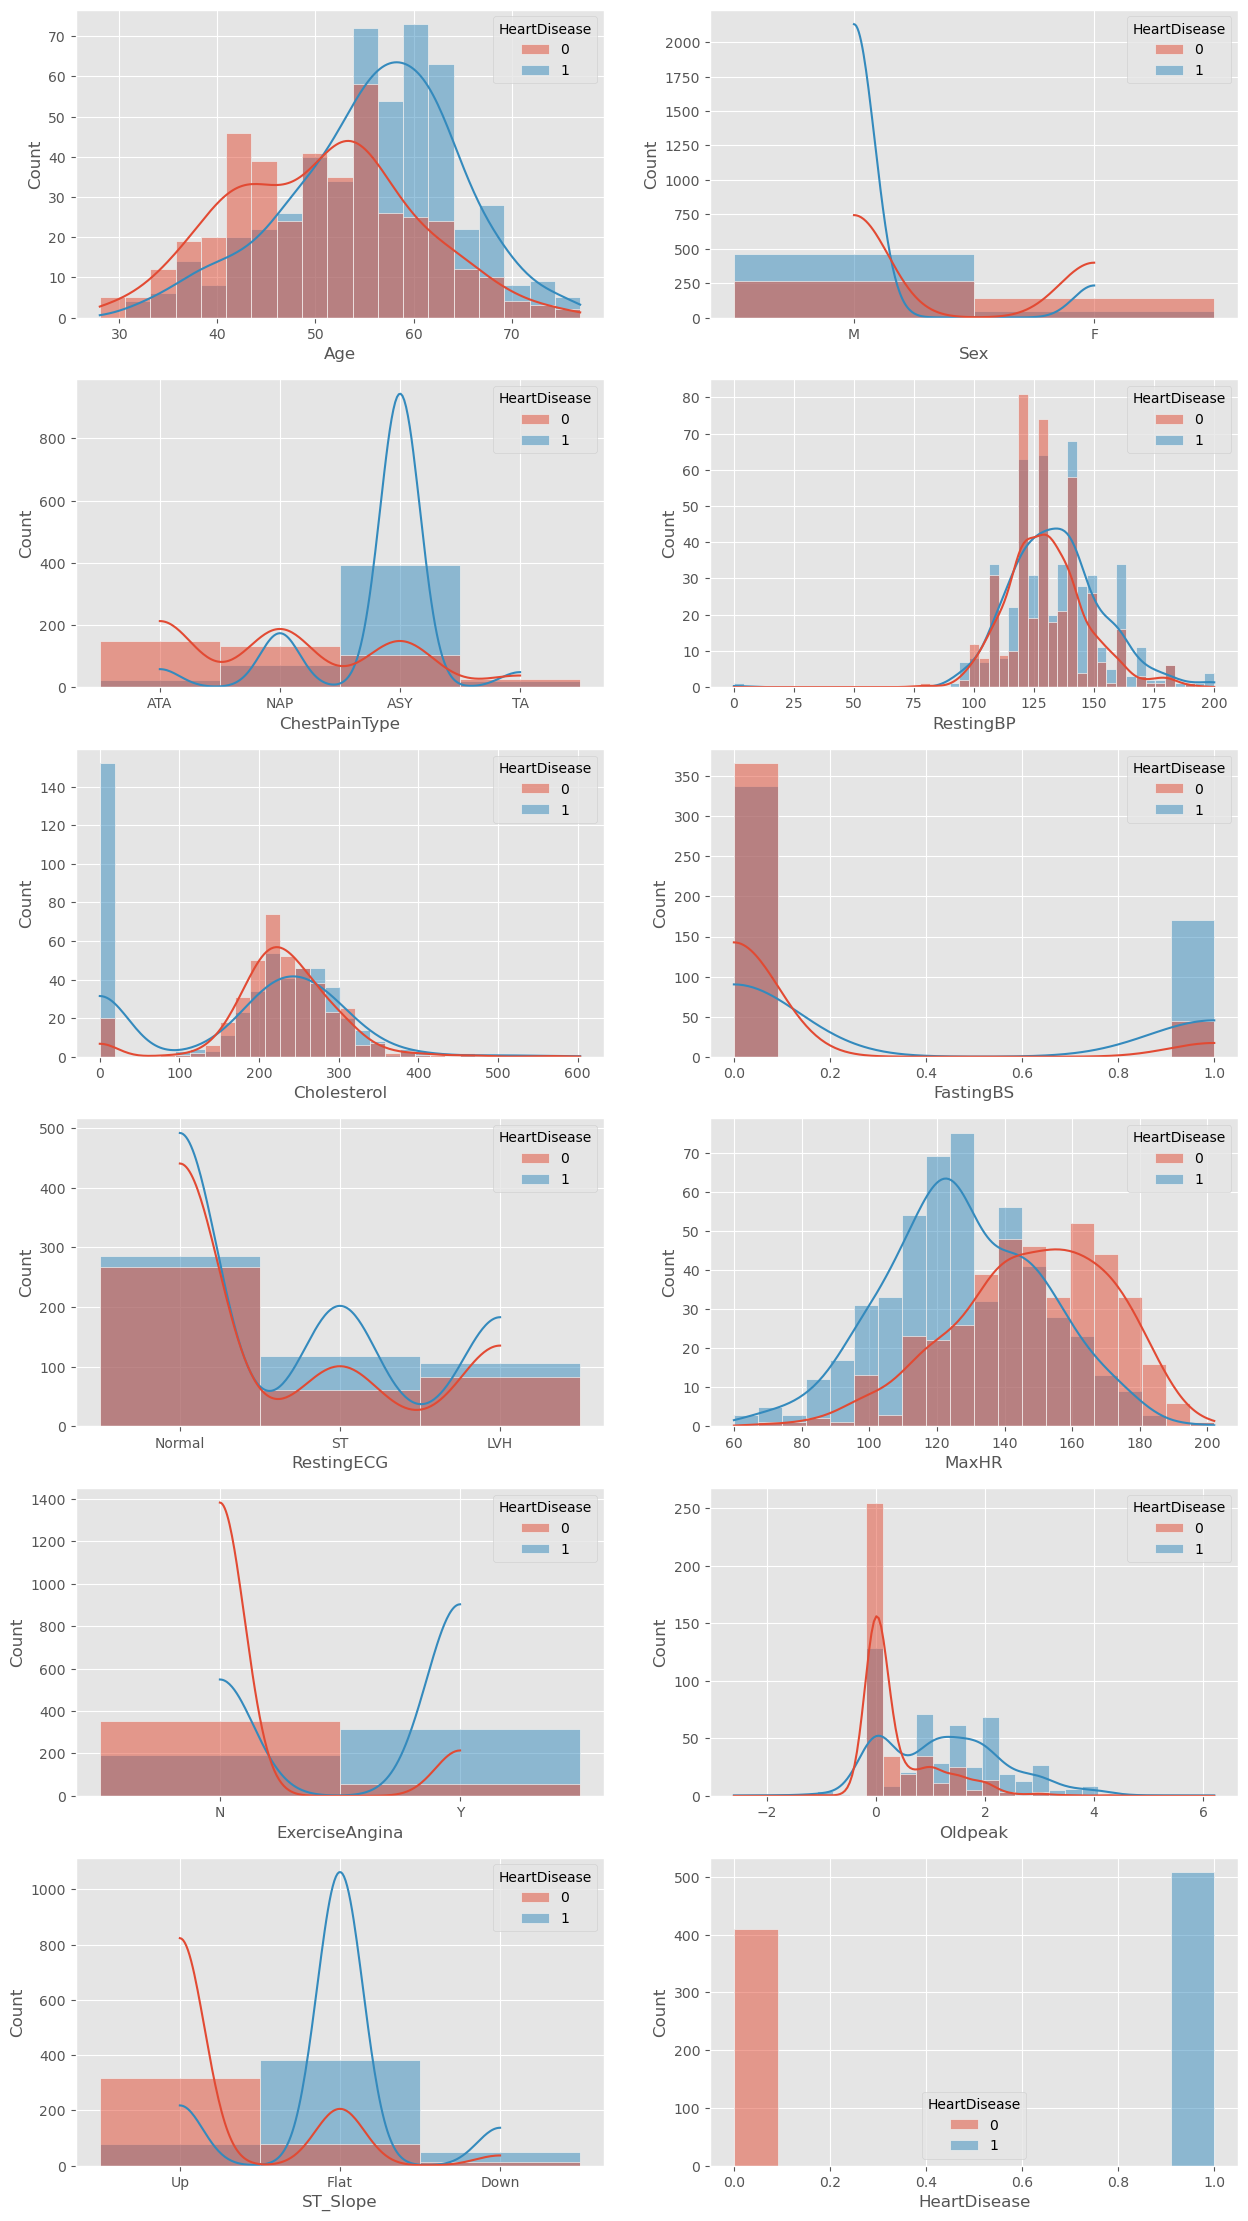

In [ ]:
# Agora vamos criar subplots pra entender melhor os dados e fazer algumas suposições

plt.subplots_adjust(hspace=0.2)
fig, axs = plt.subplots(6, 2, figsize=(15,28))

i=1

for feature in df.columns:
    plt.subplot(6,2,i)
    sns.histplot(df, x=feature, kde=True, hue='HeartDisease')
    i+=1


O que podemos entender com esse gráfico?
***Lembrando que não sou médica, não sou especialista, mas essas são algumas das coisas que consigo ver aqui e com base em algumas pesquisas que fiz sobre o assunto. Muito importante quando a gente está trabalhando em um setor, em um negócio é entender os termos, procurar mais contexto e também ter um profissional que entenda mais do assunto.***

- Idade (Age): Observa-se que o risco de desenvolver doenças cardiovasculares (DCVs) aumenta com a idade.
- Sexo (Sex): Aparentemente, os homens têm maior risco de sofrer DCVs em comparação às mulheres.
- Tipo de Dor no Peito (ChestPainType): A maioria dos casos de DCV apresenta ausência de dor no peito ou equivalentes anginosos usuais, seguidos pelos casos que apresentam dor não anginosa.
- Pressão Arterial em Repouso (RestingBP): De acordo com o site heart.org, a pressão arterial elevada pode levar ao desenvolvimento de DCVs. No histograma, é possível observar um leve aumento nos casos de DCV conforme a pressão arterial em repouso aumenta. **Além disso, foram encontrados valores iguais a zero para pressão arterial, o que é incorreto e deve ser tratado, pois não é possível uma pressão sanguínea igual a zero em seres humanos.**
- Colesterol: É amplamente conhecido que níveis elevados de colesterol podem levar a derrame, ataque cardíaco ou até insuficiência cardíaca. No entanto, segundo um artigo da Healthline, nem todo colesterol sérico é ruim. Existem três tipos de colesterol que compõem o colesterol total:
    - HDL, o “colesterol bom”;
    - LDL, o “colesterol ruim”;
    - e os triglicerídeos (TG).

    Níveis altos de HDL são benéficos, enquanto níveis elevados de LDL e TG aumentam o risco cardiovascular.

    O nível de colesterol sérico total (SC) pode ser calculado como a soma: SC [mg/dl] = HDL [mg/dl] + LDL [mg/dl] + TG [mg/dl]

    No entanto, no nosso conjunto de dados não temos as concentrações individuais de HDL, LDL e TG, apenas o valor total de colesterol. Segundo a Healthline, valores de colesterol sérico acima de 200 mg/dl já são considerados um fator de risco para doenças cardiovasculares (DCVs).

    No nosso histograma, observamos que a maioria dos casos de DCV apresenta valores acima de 200 mg/dl. **Por outro lado, também há valores iguais a zero ou extremamente altos (casos atípicos - outliers), o que é incorreto e precisa ser tratado, pois não é possível ter colesterol igual a zero em um ser humano.**

- FastingBS (Glicemia em jejum): Segundo estudos, níveis elevados de açúcar no sangue podem danificar os vasos sanguíneos e os nervos que controlam o coração. Por isso, pacientes com diabetes têm maior risco de desenvolver doenças cardiovasculares (DCVs).
Nosso conjunto de dados reflete essa condição: a maioria dos pacientes com glicemia alta também apresenta DCV.

- RestingECG (Eletrocardiograma em repouso): A maioria dos pacientes com DCV apresenta eletrocardiograma normal em repouso, mas observamos que, nos casos em que há anormalidade na onda ST-T, a quantidade de pacientes com DCV é cerca do dobro da observada entre os que não têm a doença.

- MaxHR (Frequência Cardíaca Máxima): Não sabemos em quais condições esses valores foram medidos, portanto não é possível afirmar se estão totalmente corretos. O fato é que pacientes com doenças cardiovasculares (DCVs) apresentam valores mais baixos de frequência cardíaca máxima, enquanto pacientes sem DCVs tendem a ter valores mais altos.

- ExerciseAngina (Angina induzida por exercício): A angina é uma dor ou desconforto no peito causada pela falta de sangue rico em oxigênio no músculo cardíaco. Ela não é uma doença em si, mas sim um sintoma de um problema cardíaco subjacente. Por isso, a maioria dos pacientes com DCV apresenta angina induzida por exercício.

- Oldpeak (Depressão do segmento ST): Também chamado de depressão do segmento ST, esse é um fator relacionado a várias doenças cardiovasculares. Em alguns casos, uma leve depressão pode ser considerada normal, mas observamos que pacientes com DCV tendem a apresentar valores mais altos de depressão ST — embora alguns também apresentem valores iguais a zero, indicando ausência de alteração.
- ST_Slope (Inclinação do Segmento ST): De acordo com um artigo do ECGwaves, um segmento ST ascendente (upsloping) geralmente é considerado normal. Por outro lado, os segmentos planos (flat) ou descendentes (downsloping) são vistos como anormais e podem indicar problemas cardíacos.


De modo geral também podemos ver que as variaveis categóricas não apresentam nenhum valor estranho ou categoria diferente.

In [ ]:
# Investigando os zeros do colesterol

len(df[df['Cholesterol'] == 0])*100/len(df)

18.736383442265794

Podemos ver que aproximadamente 18,7% dos valores de colesterol são iguais a zero, o que representa uma proporção considerável do conjunto de dados.
Como esse percentual é relativamente alto, remover todas essas linhas poderia causar uma perda significativa de informação, o que não é ideal. Nesse caso, poderiam ser usadas outras abordagens como inputacão de mediana.

## ✂️ Dividindo os dados em treino e teste

É muito importante dividir os dados em treino e teste antes de fazer qualquer pré-processamento.
Isso evita o chamado vazamento de dados (data leakage), que acontece quando informações do conjunto de teste são usadas, mesmo que indiretamente, para treinar o modelo.

Quando isso acontece, o modelo “aprende” coisas que ele não deveria saber, como médias, proporções ou categorias do teste — e acaba desempenhando melhor artificialmente, sem realmente ter aprendido o padrão dos dados.

Por exemplo, se fizermos tratamento de valores ausentes, normalização ou codificação de variáveis antes de dividir o dataset, essas transformações usarão estatísticas de todo o conjunto, e não apenas do treino. Isso faz com que o modelo tenha uma “pista” sobre os dados de teste.

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(df.drop([target], axis=1), df[target], test_size=0.25, random_state=42, stratify=df[target])
train_X.shape, test_X.shape

((688, 11), (230, 11))

## 🔢 Pré-processamento

Bom, em relação aos valores atípicos, zeros de colesterol, vou substituir pela mediana dos dados de treino, pra gente testar.

In [ ]:
# Calcular a mediana apenas dos valores reais (não zero)
chol_median = train_X[train_X["Cholesterol"] > 0]["Cholesterol"].median()

train_X["Cholesterol"] = train_X["Cholesterol"].replace(0, chol_median)
test_X["Cholesterol"] = test_X["Cholesterol"].replace(0, chol_median)


In [ ]:
train_X.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,53.899709,132.800872,244.465116,0.228198,136.209302,0.873837
std,9.496194,18.254936,53.557580,0.419976,26.032559,1.070478
min,29.000000,92.000000,85.000000,0.000000,60.000000,-2.600000
25%,48.000000,120.000000,215.000000,0.000000,118.000000,0.000000
50%,55.000000,130.000000,237.500000,0.000000,138.000000,0.500000
75%,61.000000,141.000000,269.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,5.600000


### Balanceamento das classes

In [ ]:
train_y.value_counts(normalize=True) * 100

HeartDisease
1    55.377907
0    44.622093
Name: proportion, dtype: float64

In [ ]:
train_y.value_counts()

HeartDisease
1    381
0    307
Name: count, dtype: int64

Temos um leve desbalanceamento. Não vejo a necessidade de balancear. Podemos manter assim e analisar os resultados, caso precise, podemos voltar e fazer o balanceamento.

In [ ]:
# oversample = SMOTE(random_state=42, k_neighbors=10)
# train_X, train_y = oversample.fit_resample(train_X, train_y)
# train_y.value_counts()

### 🔢 Codificação das features

Agora vamos começar o processo de transformação das features, ou seja, transformando colunas com valores categóricos de texto em valores numéricos, para que o modelo de Machine Learning consiga interpretar corretamente essas informações.

In [ ]:
train_X["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
# Codificando variáveis binárias diretamente
train_X["ExerciseAngina"] = train_X["ExerciseAngina"].map({'N': 0, 'Y': 1})

test_X["ExerciseAngina"] = test_X["ExerciseAngina"].map({'N': 0, 'Y': 1})

In [ ]:
train_X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
637,43,M,ASY,115,303.0,0,Normal,181,0,1.2,Flat
541,76,M,NAP,104,113.0,0,LVH,120,0,3.5,Down
570,56,M,ASY,128,223.0,0,ST,119,1,2.0,Down
611,62,M,TA,135,139.0,0,ST,137,0,0.2,Up
685,61,M,ASY,120,260.0,0,Normal,140,1,3.6,Flat


In [ ]:
test_X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
311,60,M,ASY,125,237.5,1,Normal,110,0,0.1,Up
52,45,M,ATA,140,224.0,1,Normal,122,0,0.0,Up
466,55,M,NAP,120,237.5,0,ST,125,1,2.5,Flat
310,65,M,ASY,155,237.5,0,Normal,154,0,1.0,Up
735,49,M,NAP,120,188.0,0,Normal,139,0,2.0,Flat


Agora, para as outras features categóricas, vamos usar one hot encoding. Essas outras, como ChestPainType, RestingECG e ST_Slope, não podem ser representadas por um único número (ex: 0, 1, 2), porque isso criaria uma relação numérica inexistente entre as categorias. O OneHotEncoder cria uma nova coluna para cada categoria, atribuindo: 1 → se a linha pertence àquela categoria, 0 → caso contrário.

In [ ]:
# One-hot encoding com get_dummies
train_X = pd.get_dummies(train_X, columns=categorical_f, drop_first=False)

test_X = pd.get_dummies(test_X, columns=categorical_f, drop_first=False)

No nosso conjunto, as variáveis categóricas são nominais, ou seja, não possuem ordem. Em um ambiente de experimentação, como o que estamos trabalhando aqui, utilizamos o get_dummies() por ser simples e imediato. No entanto, esse método não mantém memória das categorias que já foram vistas: ele apenas cria novas colunas com base nos dados fornecidos naquele momento. Isso significa que, se um novo valor categórico aparecer no futuro ou se alguma categoria presente no treino não estiver nos dados de inferência, a estrutura de colunas pode mudar e o modelo não será capaz de interpretar corretamente a entrada.

Em cenários de produção, onde previsões são feitas continuamente com dados novos, a abordagem mais adequada é utilizar o OneHotEncoder do scikit-learn. Ele “aprende” o conjunto de categorias no treinamento e garante que os dados recebidos posteriormente tenham exatamente o mesmo formato esperado pelo modelo. Dessa forma, a transformação se torna reprodutível, robusta e adequada ao processo de deploy.

In [ ]:
# Converte para float
train_X = train_X.astype('float')
test_X = test_X.astype('float')

In [ ]:
train_X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_F,Sex_M
637,43,115,47,0,-75,0,1,1,0,0,0,0,1,0,0,1,0,0,1
541,76,104,113,0,120,0,3,0,0,1,0,1,0,0,1,0,0,0,1
570,56,-128,-33,0,119,1,2,1,0,0,0,0,0,1,1,0,0,0,1
611,62,-121,-117,0,-119,0,0,0,0,0,1,0,0,1,0,0,1,0,1
685,61,120,4,0,-116,1,3,1,0,0,0,0,1,0,0,1,0,0,1


### 🔍 Correlações

É importante remover variáveis altamente correlacionadas para melhorar o desempenho do modelo e evitar redundâncias.
Podemos identificar essas correlações usando o método .corr() do pandas e visualizar a matriz com o Plotly Express.

- Tons mais claros indicam correlações positivas (as variáveis aumentam juntas).
- Tons mais escuros indicam correlações negativas (quando uma variável aumenta, a outra tende a diminuir).

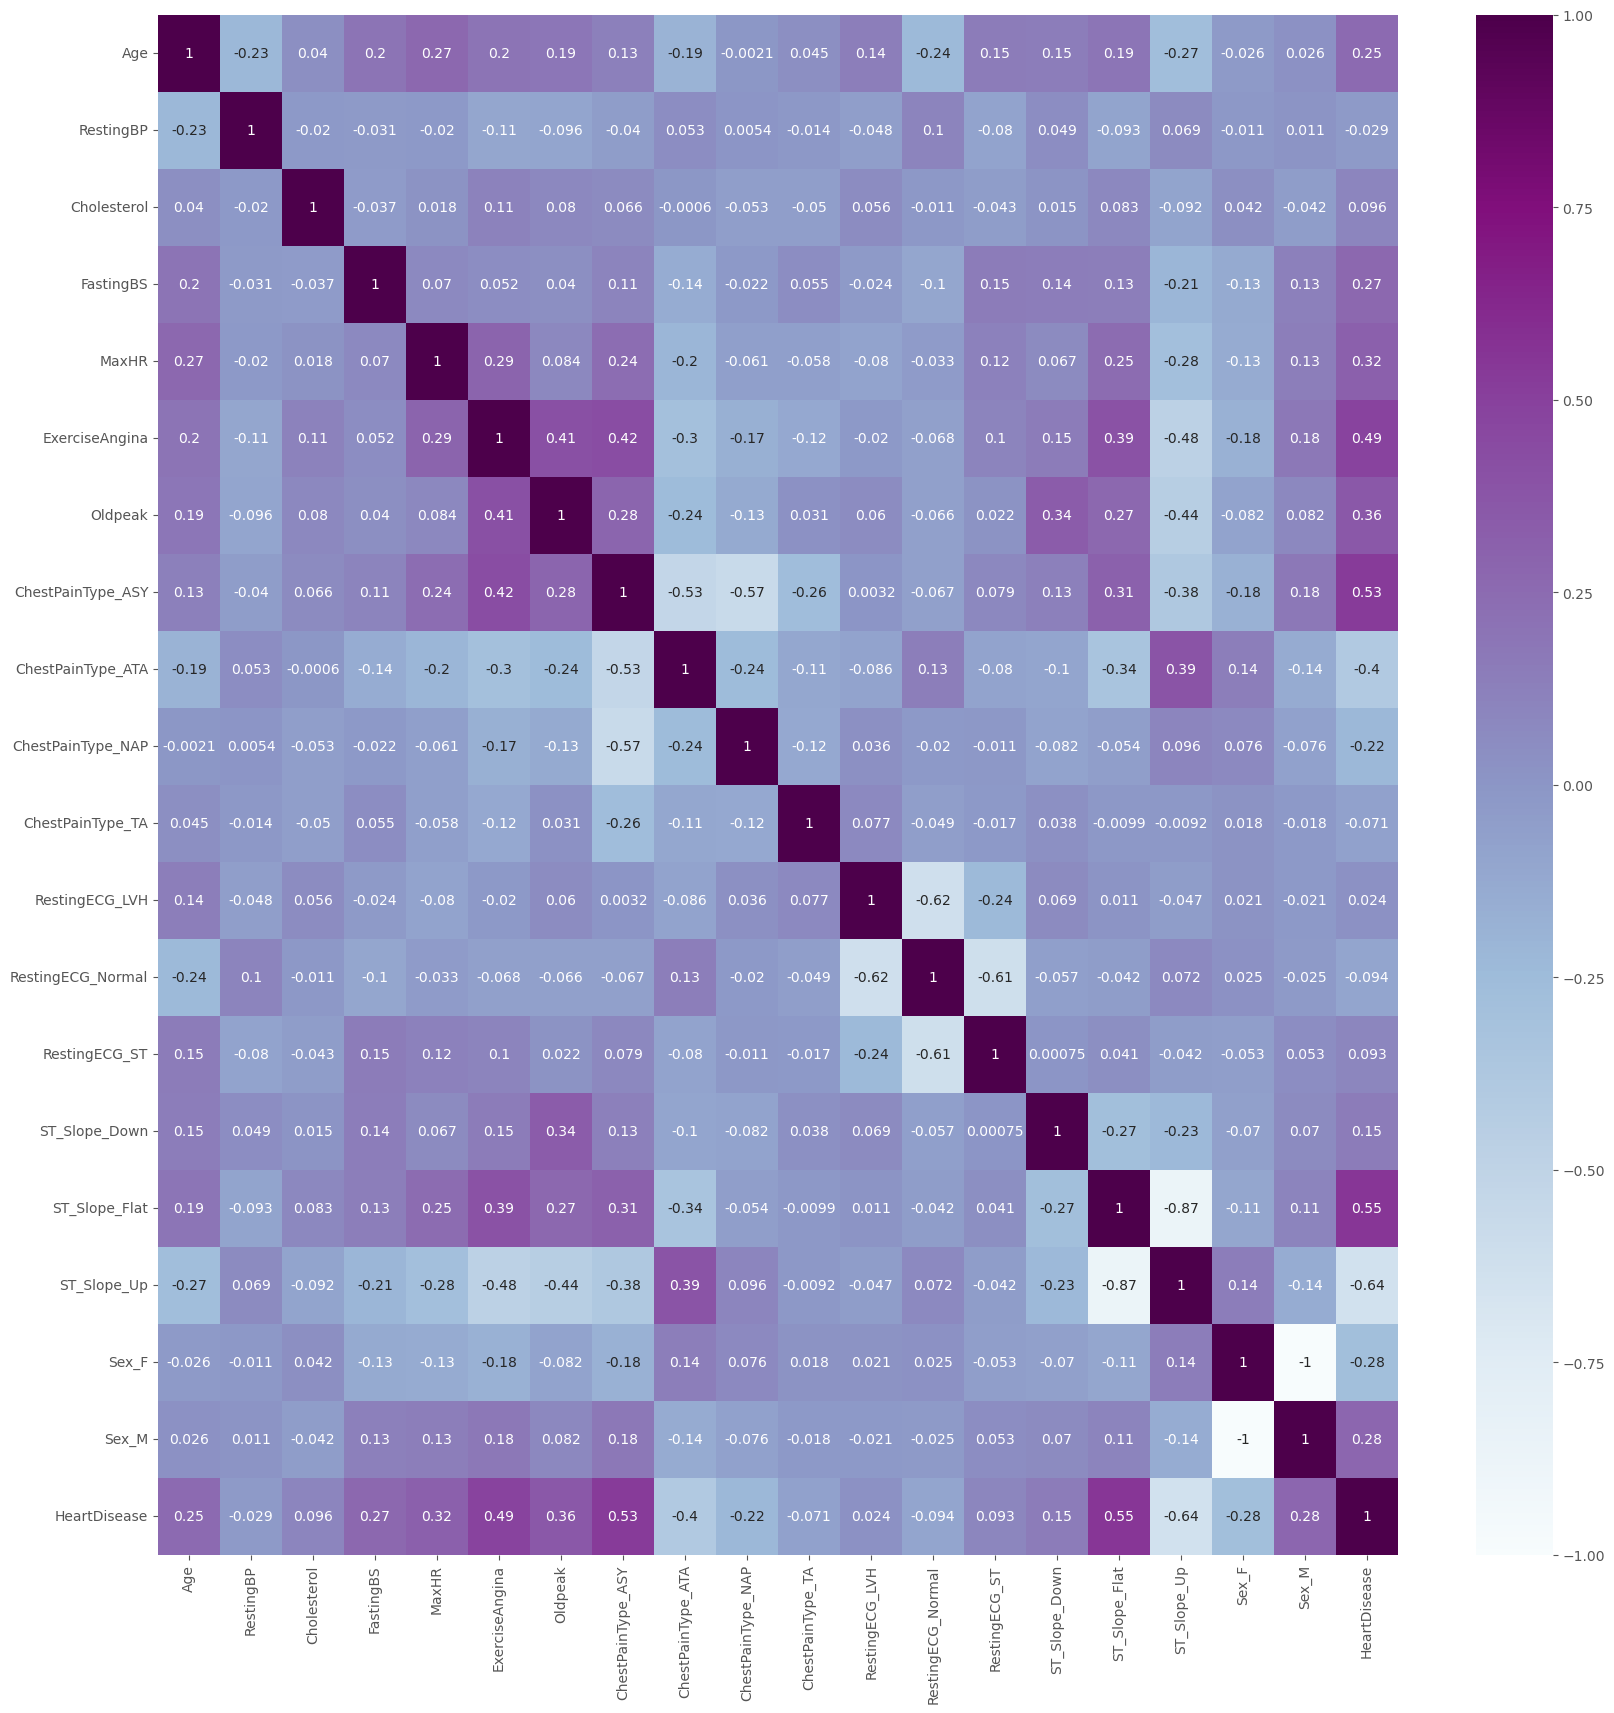

In [ ]:
all_df = pd.concat([train_X, train_y], axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(all_df.corr(), annot=True, cmap="BuPu");

A maioria das correlações entre variáveis está abaixo de 0.7, tanto positivas quanto negativas. Isso indica que não há uma relação linear muito forte entre as features. A exceção pode ser entre as variáveis que surgiram do One-Hot Encoding (como ST_Slope_Down, ST_Slope_Flat, ST_Slope_Up), que naturalmente são correlacionadas — mas isso é esperado, pois são categorias de uma mesma variável original.

- Valores |correlação| > 0.8 ou 0.9 geralmente indicam alta multicolinearidade → seria recomendável remover uma das variáveis.
- Aqui, as correlações estão bem mais baixas, então nenhuma variável parece redundante.

Aquele -1 na correlação entre Sex_F e Sex_M mostra que as duas dummies do sexo são perfeitamente inversas entre si. Isso acontece porque: Se a pessoa não é feminina (Sex_F = 0), então é masculina (Sex_M = 1)… e vice-versa.

Ou seja, uma coluna é completamente redundante com a outra → alta colinearidade perfeita. Podemos remover uma das colunas.

In [ ]:
train_X = train_X.drop(columns="Sex_M")
test_X = test_X.drop(columns="Sex_M")

In [ ]:
train_X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_F
637,43,115,47,0,-75,0,1,1,0,0,0,0,1,0,0,1,0,0
541,76,104,113,0,120,0,3,0,0,1,0,1,0,0,1,0,0,0
570,56,-128,-33,0,119,1,2,1,0,0,0,0,0,1,1,0,0,0
611,62,-121,-117,0,-119,0,0,0,0,0,1,0,0,1,0,0,1,0
685,61,120,4,0,-116,1,3,1,0,0,0,0,1,0,0,1,0,0


In [ ]:
test_X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_F
311,60,125,-19,1,110,0,0,1,0,0,0,0,1,0,0,0,1,0
52,45,-116,-32,1,122,0,0,0,1,0,0,0,1,0,0,0,1,0
466,55,120,-19,0,125,1,2,0,0,1,0,0,0,1,0,1,0,0
310,65,-101,-19,0,-102,0,1,1,0,0,0,0,1,0,0,0,1,0
735,49,120,-68,0,-117,0,2,0,0,1,0,0,1,0,0,1,0,0


### Normalização

Agora vamos normalizar os dados para colocar todas as variáveis na mesma escala e evitar que diferenças numéricas influenciem o modelo.

Quando aplicamos o StandardScaler aos dados, ele faz uso da distribuição normal e, portanto, transforma cada valor nos dados de forma que a média dos dados padronizados seja zero e o desvio padrão seja igual a um.

In [ ]:
std = StandardScaler()
#mms = MinMaxScaler()

train_X[continuos_f] = std.fit_transform(train_X[continuos_f])
#X_train[continuos_f] = mms.fit_transform(X_train[continuos_f])

#X_val[continuos_f] = std.transform(X_val[continuos_f])
#X_val[continuos_f] = mms.transform(X_val[continuos_f])

test_X[continuos_f] = std.transform(test_X[continuos_f])
#X_test[continuos_f] = mms.transform(X_test[continuos_f])

In [ ]:
train_X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_F
637,-1.148633,1.239102,1.372291,0,-0.498847,0,0.293665,1,0,0,0,0,1,0,0,1,0,0
541,2.328972,1.140674,2.842597,0,1.373503,0,2.324235,0,0,1,0,1,0,0,1,0,0,0
570,0.221333,-0.935260,-0.409897,0,1.363902,1,1.308950,1,0,0,0,0,0,1,1,0,0,0
611,0.853625,-0.872624,-2.281194,0,-0.921326,0,-0.721620,0,0,0,1,0,0,1,0,0,1,0
685,0.748243,1.283842,0.414365,0,-0.892520,1,2.324235,1,0,0,0,0,1,0,0,1,0,0


## Modelagem

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier


# Criando o modelo de Regressão Logística
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Treinando o modelo com os dados de treino
log_model.fit(train_X, train_y)

NameError: name 'train_X' is not defined

In [ ]:
y_pred_lr = log_model.predict(test_X)
y_pred_lr

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0])

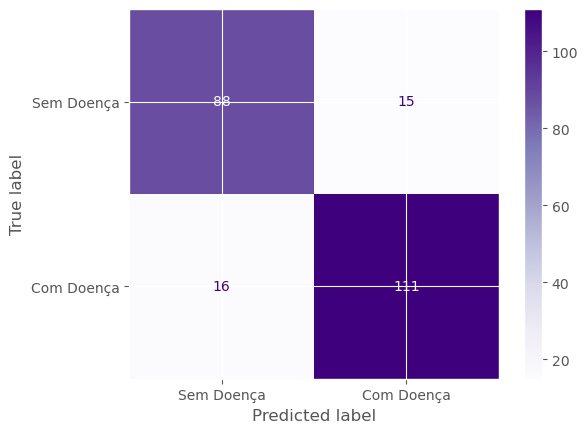

In [ ]:
cm = confusion_matrix(test_y, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sem Doença", "Com Doença"])
disp.plot(cmap='Purples')




- 88 → O modelo acertou: pessoas sem doença preditas corretamente como sem doença. (Verdadeiros Negativos)

- 111 → O modelo acertou: pessoas com doença preditas corretamente como com doença. (Verdadeiros Positivos)

- 15 → Errou: pessoas sem doença que o modelo previu como com doença. (Falsos Positivos)

- 16 → Errou: pessoas com doença que o modelo previu como sem doença. (Falsos Negativos)



Recall é mais importante

Porque queremos minimizar os falsos negativos — ou seja, garantir que quem tem a doença seja identificado.

Recall alto = poucos falsos negativos.

Mesmo que o modelo acuse algumas pessoas saudáveis como doentes (falsos positivos), é preferível investigar melhor do que deixar alguém sem diagnóstico.

In [ ]:
from sklearn.metrics import precision_score

# Para calcular a precisão, basta chamar a função "precision_score" passando os rótulos verdadeiros e previstos como argumentos:
precision = precision_score(test_y, y_pred_lr)

# A precisão será um valor entre 0 e 1:
print(precision)


from sklearn.metrics import recall_score

# Para calcular o recall, basta chamar a função "recall_score" passando os rótulos verdadeiros e previstos como argumentos:
recall = recall_score(test_y, y_pred_lr)

# O recall será um valor entre 0 e 1:
print(recall)

precision: dos que ele previou como positivos, quantos ele acertou.

recall: de todas as pessoas que ele poderia classificar como positivas, quantas ele acertou.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', weights='distance')
knn.fit(train_X, train_y)

,n_neighbors,7
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred_knn = knn.predict(test_X)

In [ ]:
print(y_pred_knn[:10])

[1 0 1 0 0 0 0 0 0 1]


              precision    recall  f1-score   support

           0       0.83      0.80      0.81       103
           1       0.84      0.87      0.85       127

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.83      0.83      0.83       230



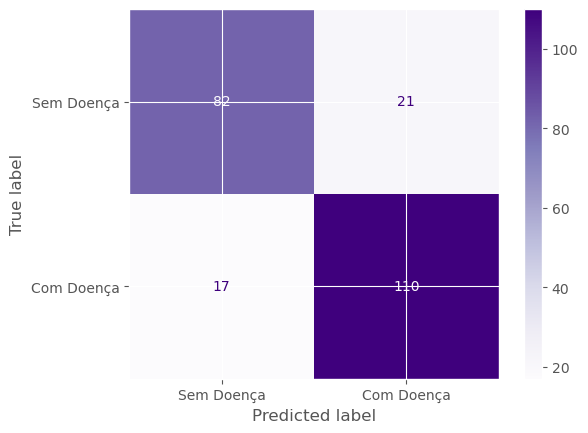

In [ ]:

cm = confusion_matrix(test_y, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sem Doença", "Com Doença"]).plot(cmap="Purples")

No geral, nossos dois primeiros modelos já apresentaram resultados bem satisfatórios para uma primeira abordagem.
Entre eles, a Regressão Logística obteve o melhor desempenho — o que é muito positivo para um caso relacionado à saúde. Ainda assim, quando estamos lidando com vidas, cada ponto de melhoria conta.

Por isso, há diversas oportunidades de evolução:
- Testar modelos mais avançados (Random Forest, Gradient Boosting, XGBoost…)
- Realizar ajuste de hiperparâmetros (GridSearchCV, RandomSearchCV ou Bayesian Optimization)
- Investigar melhor a importância das variáveis e possíveis interações
- Aplicar técnicas de balanceamento de classes, se necessário

Em resumo: já construímos uma base sólida, mas o desenvolvimento de um modelo de Machine Learning é um processo iterativo — sempre há como refinar e obter resultados ainda melhores.

## Salvando modelo e as predições

In [ ]:
# Cria uma cópia para não alterar o original
df_test_pred = test_X.copy()

# Adiciona variável alvo real, se quiser
df_test_pred['HeartDisease_real'] = test_y.values

# Adiciona as previsões do modelo
df_test_pred['HeartDisease_pred'] = y_pred_lr

# Salvar em csv
df_test_pred.to_csv("s3://aws-alura-ds22/predictions/test_predictions.csv", index=False)
df_test_pred.head()

Agora que treinamos nosso modelo, vamos supor que a gente queira salvar esse modelo. porque?

Salvar o modelo evita retrabalho, acelera reuso e permite gerar previsões futuras sem precisar treinar tudo de novo. Isso fica ainda mais crítico se imaginarmos um cenário onde o modelo é mais complexo, com grande volume de dados ou leva horas (ou até dias) para ser treinado.

Nesse caso, a serialização (salvamento) do modelo é o que garante que o trabalho feito não se perca e possa ser reaproveitado depois. então é isso que vamos fazer aqui agora.


Agora uma próxima etapa que eu super recomendo que vocês tentem, testem fazer seria encapsular todas as etapas de pré-processamento e o modelo final em um pipeline do scikit-learn, garantindo que os dados passem sempre pelas mesmas transformações antes da predição — o que é essencial para aplicações em produção, como APIs, dashboards ou sistemas automatizados.

Além disso, quando pensamos em escalar o projeto, plataformas como o Amazon SageMaker oferecem recursos robustos para operacionalizar esse fluxo: é possível criar jobs de processamento, jobs de treinamento automatizados e endpoints de inferência em tempo real, dessa forma conseguimos garantir um processo mais automatizado, escalavel e sempre disponivel.

Então, tudo o que começamos hoje pode evoluir para uma solução robusta, monitorada e pronta para produção, aproximando ainda mais nossos modelos do mundo real.

In [ ]:
import joblib
import boto3


model_filename = "log_reg_model.pkl"
joblib.dump(log_model, model_filename)

bucket = "aws-alura-ds22"
prefix = "predictions"
key = f"{prefix}/{model_filename}"

s3 = boto3.client("s3")
s3.upload_file(model_filename, bucket, key)

print(f"✅ Modelo salvo em: s3://{bucket}/{key}")

✅ Modelo salvo em: s3://alura-aws-ciencia-dados/predictions/log_reg_model.pkl


No nosso contexto atual, estamos trabalhando em um ambiente de teste e experimentação: temos uma base pequena, um modelo simples e não estamos realizando otimização intensiva. Isso faz com que treinar e reprocessar tudo diretamente no notebook seja rápido e com baixo custo computacional — perfeito para fins didáticos.

Mas, em aplicações reais, o cenário é bem diferente: lidamos com grandes volumes de dados, pipelines mais complexos e técnicas como Grid Search ou otimização de hiperparâmetros, que exigem muito mais processamento. Nesse contexto, salvar o modelo treinado passa a ser fundamental — evitando retrabalho e permitindo gerar previsões de forma rápida e reprodutível, sem precisar retreinar tudo a cada uso.

Essa etapa nos aproxima do fluxo de produção. Em um sistema real — onde previsões podem ser feitas sob demanda, como em uma API ou aplicação web — o modelo precisa receber os dados já pré-processados de maneira consistente. E é por isso que encapsular as transformações e o modelo em um único Pipeline do scikit-learn se torna essencial para garantir qualidade e evitar erros.

E quando falamos em escala de verdade — centenas ou milhares de previsões por dia, atualização contínua de modelos e necessidade de monitorar performance — ferramentas especializadas entram em cena. Plataformas como o Amazon SageMaker automatizam esse ciclo de vida, oferecendo recursos como Processing Jobs, Training Jobs e Endpoints de inferência totalmente gerenciados, garantindo confiabilidade e disponibilidade do modelo em produção.

Por isso, como desafio final para quem quiser ir além do ambiente de experimentação, a proposta é evoluir este projeto:
- encapsular o pré-processamento e o modelo em um único Pipeline do scikit-learn
- salvar esse artefato treinado no S3
- criar uma interface simples em Streamlit (com python), consumindo o modelo salvo para realizar previsões com novos dados

Assim, vocês experimentam não apenas a construção do modelo, mas também a entrega de valor de forma prática, aproximando do que acontece em soluções reais.